In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import random as rand
import matplotlib.pyplot as plt 


#1: LOAD THE TEST AND TRAIN SET

train_dataset = dsets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = dsets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified


In [0]:

#2: LOOPING OVER THE DATASET

batch_size = 200
n_iters = 5000
number_of_epochs =int(n_iters / (len(train_dataset) / batch_size))
 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)
 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
 

In [0]:
#3: CREATE THE LOGISTIC REGRESSION MODEL CLASS
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(LogisticRegressionModel, self).__init__()
        self.linear1 = nn.Linear(input_dimension, 500)
        self.linear2 = nn.Linear(500, output_dimension)
        self.relu = nn.ReLU()
     
    def forward(self, x):
        out = self.relu(self.linear1(x))
        out = self.linear2(out)
        return out

In [0]:
#CALLING THE LOGISTIC REGRESSION CLASS MODEL WITH VALUES FOR THE INPUT AND OUTPUT DIMENSIONS
input_dimension = 3*32*32
output_dimension = 10
 
model = LogisticRegressionModel(input_dimension, output_dimension)

In [0]:
#5 CALCULATING THE CROSS ENTROPY

criterion = nn.CrossEntropyLoss()

In [0]:

#6 call the optimizer with a fixed learning rate


learning_rate = 0.08
 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

/home/manoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:59: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/manoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:60: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Iteration: 200. Loss: 1.92900156975. Accuracy: 34
Iteration: 400. Loss: 1.93885052204. Accuracy: 36
Iteration: 600. Loss: 1.72069132328. Accuracy: 38
Iteration: 800. Loss: 1.64818096161. Accuracy: 41
Iteration: 1000. Loss: 1.69943141937. Accuracy: 43
Iteration: 1200. Loss: 1.55988764763. Accuracy: 44
Iteration: 1400. Loss: 1.5512816906. Accuracy: 44
Iteration: 1600. Loss: 1.64937853813. Accuracy: 44
Iteration: 1800. Loss: 1.55699694157. Accuracy: 43
Iteration: 2000. Loss: 1.40170121193. Accuracy: 43
Iteration: 2200. Loss: 1.5075442791. Accuracy: 47
Iteration: 2400. Loss: 1.48262786865. Accuracy: 44
Iteration: 2600. Loss: 1.43952298164. Accuracy: 47
Iteration: 2800. Loss: 1.3860244751. Accuracy: 45
Iteration: 3000. Loss: 1.39092981815. Accuracy: 49
Iteration: 3200. Loss: 1.30841457844. Accuracy: 47
Iteration: 3400. Loss: 1.37712657452. Accuracy: 48
Iteration: 3600. Loss: 1.44597387314. Accuracy: 49
Iteration: 3800. Loss: 1.27307116985. Accuracy: 49
Iteration: 4000. Loss: 1.46487903595. 

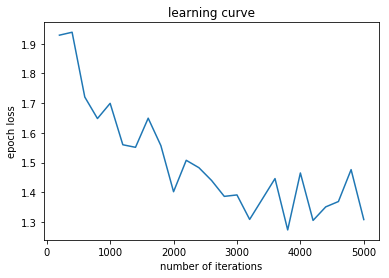

In [0]:

#7 TRAIN THE MODEL

iter = 0
epoch_loss=[]
iteration_no=[]
for epoch in range(number_of_epochs):
    for i, (img, labels) in enumerate(train_loader):
         
        img = Variable(img.view(-1, 3*32*32))
        labels = Variable(labels)
         
        # the gradients are cleared with respect to the parameters
        optimizer.zero_grad()
         
        # get the output from the model
        outputs = model(img)
         
        # Calculate the loss
        loss = criterion(outputs, labels)#
         
        # the gradients are retrieved
        loss.backward()
         
        # Updating parameters
        optimizer.step()
         
        iter += 1
         
        if iter % 200 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for img, labels in test_loader:
                                
                img = Variable(images.view(-1, 3*32*32))
                 
                #To get logits/output
                outputs = model(img)
                 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                 
                
                total += labels.size(0)
                 
                
                correct += (predicted.cpu() == labels.cpu()).sum()
            #calculating the accuracy          
            accuracy = 100 * correct / total
             
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.data[0], accuracy))
            epoch_loss.append(loss.data[0])
            iteration_no.append(iter)
# plotting the points  
plt.plot(iteration_no,epoch_loss) 
  
# naming the x axis 
plt.xlabel('number of iterations') 
# naming the y axis 
plt.ylabel('epoch loss') 
  
# giving a title to my graph 
plt.title('learning curve') 
  
# function to show the plot 
plt.show()             






####the best hyperparameters found are the number of hidden neurons and learning rate

In [0]:
##k fold cross validation


import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SubsetRandomSampler
indices = list(range(len(train_dataset))) # start with all the indices in training set
split = 10000 # defining the split size

# Define your batch_size
batch_size = 200

# Random, non-contiguous split
validation_idx = np.random.choice(indices, size=split, replace=False)
train_idx = list(set(indices) - set(validation_idx))

##sampling the test and train set by subset random sampling
#train loader for training the model using k fold
train_sampler = SubsetRandomSampler(train_idx)
validation_sampler = SubsetRandomSampler(validation_idx)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                batch_size=batch_size, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                batch_size=1, sampler=validation_sampler)

#test loader for training the model using k fold
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=1,
                                          shuffle=False)
